In [1]:
from pinnse.schrodinger_eq_exact_values import *

In [2]:
def TISE_hydrogen_exact_test():
    def func_R(x): # http://hyperphysics.phy-astr.gsu.edu/hbase/quantum/hydwf.html#c3 --> in order to compare
                   # be careful with the prefactors of polar, azimuth
        factor = 4 / (81*np.sqrt(6)*a0**(3/2))
        return factor * (6 - (x/a0)) * (x/a0) * np.exp(-x/(3*a0))

    r = np.linspace(0, 25, 100)
    theta = np.linspace(0, pi, 100)
    phi = np.linspace(0, 2*pi, 100)

    R_nl, f_lm, g_m = TISE_hydrogen_exact(r, theta, phi, 2, 1, -1)


    ###########################
    ## Radial function test ##
    ###########################
    from scipy.integrate import simps, quad
    integral = simps(R_nl**2 * (r**2), r)
    print(integral)
    plt.figure(figsize=(12,8))
    plt.plot(r, func_R(r), 'ok')
    plt.plot(r, R_nl, '.r')
    plt.plot(r, r**2 * R_nl**2, '.b') # actually there also is a factor 4pi
    plt.show()
    ###########################


    ############################
    ## Angular function test ##
    ############################
    from scipy.integrate import simps, quad
    integral1 = simps(f_lm**2 * np.sin(theta), theta)
    print(integral1)
    integral2 = simps(g_m**2, phi)
    print(integral2)
    Y_lm = np.outer(g_m, f_lm) 
    rho = np.abs(Y_lm)**2 # prob distribution of angular part
    xs = 1 * np.outer(np.cos(phi), np.sin(theta)) #radius=1 
    ys = 1 * np.outer(np.sin(phi), np.sin(theta))
    zs = 1 * np.outer(np.ones(np.size(theta)), np.cos(theta))

    color_map = cm.jet
    scalarMap = cm.ScalarMappable(norm=plt.Normalize(vmin=np.min(rho),vmax=np.max(rho)), cmap=color_map)
    C = scalarMap.to_rgba(rho) #scalarmap according to the #probability distribution stored in rho
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(xs, ys, zs, rstride=2, cstride=2, color='b', facecolors=C) 
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    ############################


    ############################
    ## Complete orbitals ##
    ############################
    # section of the orbitals with z=0 or y=0
    rmax = 30 
    n_points = 1000 # must be an even number
    x = np.linspace(-rmax,rmax,n_points)
    # y = np.linspace(-rmax,rmax,n_points)
    # X, Y = np.meshgrid(x, y)
    # r = np.sqrt(X**2 + Y**2)
    # theta = pi / 2   # since we are at z=0
    # phi = np.arctan(Y / X)
    z = np.linspace(-rmax,rmax,n_points)
    X, Z = np.meshgrid(x, z)
    r = np.sqrt(X**2 + Z**2)
    theta = np.arctan(np.sqrt(X**2) / Z)
    theta = np.where(theta<0,np.pi+theta,theta)
    phi = [pi*np.ones([n_points,int(np.floor(n_points/2))])
        , np.zeros([n_points,int(np.ceil(n_points/2))])]
    phi = np.hstack(phi)

    R_nl, f_lm, g_m = TISE_hydrogen_exact(r, theta, phi, 3,1,0)
    wavefunction = R_nl*f_lm*g_m
    p = wavefunction**2

    fig = plt.figure()
    plt.imshow(p,extent=[-rmax, rmax, -rmax, rmax], interpolation='none',origin='lower', cmap=cm.hot) 
    plt.xlabel('x')
    #plt.ylabel('y')
    plt.ylabel('z')
    plt.show()

In [3]:
def orbital_normalization_test():
    radial_extent = 100 # extents: 40 for n=3, 70 for n=4, 100 for n=5, 140 for n=6
    n_to_consider = 5

    from scipy.integrate import simps
    #rmax = 20
    rmax = np.sqrt((radial_extent**2) / 3)
    n_points = 100 # must be an even number
    x = np.linspace(-rmax,rmax,n_points)
    y = np.linspace(-rmax,rmax,n_points)
    z = np.linspace(-rmax,rmax,n_points)
    X, Y, Z = np.meshgrid(x, y, z)
    r = np.sqrt(X**2 + Y**2 + Z**2)
    theta = np.arctan(np.sqrt(X**2 + Y**2) / Z)
    theta = np.where(theta<0,np.pi+theta,theta)
    phi = np.where(X<0, np.arctan(Y/X), np.arctan(Y/X)+pi)

    R, f, g = TISE_hydrogen_exact(r, theta, phi, n=n_to_consider, l=1, m=0, Z=1)
    gt_u = R*f*g
    gt_v = np.zeros_like(gt_u)

    #integrand = predictions_u**2 # if we assume Im(wavefunction)=0
    integrand = gt_u**2 + gt_v**2
    integral = simps(integrand, z)
    integral = simps(integral, y)
    integral = simps(integral, x)
    normalization_costant = 1. / np.sqrt(integral)
    print("===================")
    print(integral)
    print(normalization_costant)
    print("===================")

In [4]:
def TISE_stark_effect_exact_test():
    principle_quantum_number = 3
    # ----------------------
    rmax = 30
    n_points = 1000 # must be an even number
    x = np.linspace(-rmax,rmax,n_points)
    z = np.linspace(-rmax,rmax,n_points)
    X, Z = np.meshgrid(x, z)
    r = np.sqrt(X**2 + Z**2)
    theta = np.arctan(np.sqrt(X**2) / Z)
    theta = np.where(theta<0,np.pi+theta,theta)
    phi = [pi*np.ones([n_points,int(np.floor(n_points/2))])
        , np.zeros([n_points,int(np.ceil(n_points/2))])]
    phi = np.hstack(phi)

    electric_field = 10e6
    eigenvalues, eigenvectors = TISE_stark_effect_exact(r, theta, phi, electric_field, n=principle_quantum_number, m=0) 
    # ----------------------

    ener = eigenvalues[0] / (- 3 * e * electric_field * a0 / 2)
    print(ener)
    print(np.rint(ener))

    print(eigenvalues / (- 3 * e * electric_field * a0 / 2) )
    from matplotlib import cm
    for i in range(len(eigenvalues)):
        # if i != 0:
        #     continue
        p = eigenvectors[i]**2
        fig = plt.figure()
        plt.imshow(p,extent=[-rmax, rmax, -rmax, rmax], interpolation='none',origin='lower', cmap=cm.hot) 
        plt.xlabel('x')
        plt.ylabel('z')
        plt.title('Probability distribution')
        plt.show()

1.0000025454886887


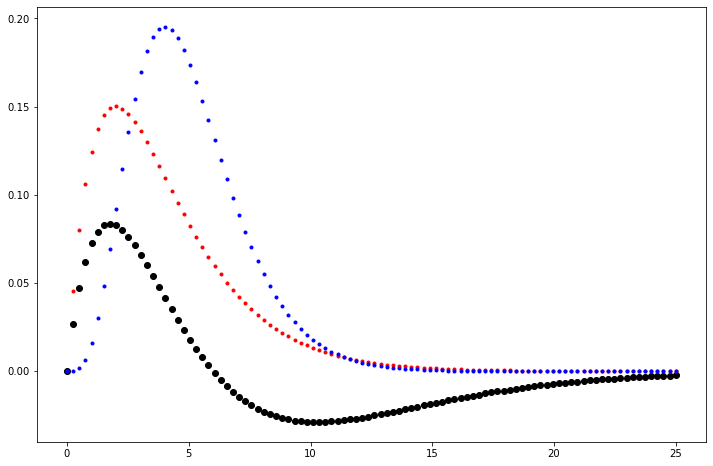

1.000000139370896
0.49999322795692835


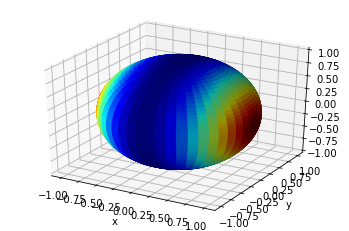

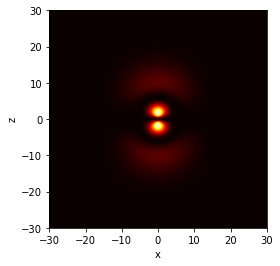

In [5]:
TISE_hydrogen_exact_test()

In [6]:
orbital_normalization_test()

0.9944829078066905
1.0027700131945267


-6.0000000000000036
-6.0
[-6.00000000e+00  6.00000000e+00 -3.62588215e-16]


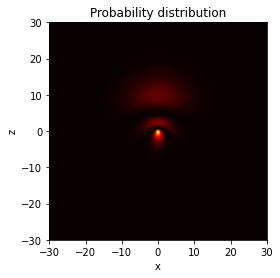

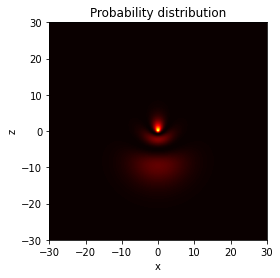

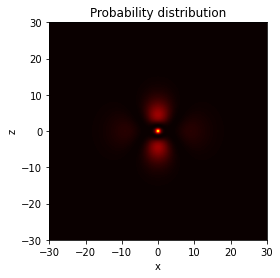

In [7]:
TISE_stark_effect_exact_test()